<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Movie Reviews

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras import models
from keras import layers


# Loading the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [14]:
# Decode reviews back to English words

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()      

# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])    

# decodes the review. 
# Note that indices are offset by 3 because 0, 1, and 2 are reserved indices 
# for 'padding', 'start of sequence', and 'unknown'
decoded_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

# decoded_review

Preparing the data

In [15]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape(len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

# Vectorized training data and labels
x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

# Vectorized test data and labels
x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

# x_train[0]

Building the network

In [16]:
# The model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Validating the approach

In [17]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                   batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5211 - accuracy: 0.7849 - val_loss: 0.4064 - val_accuracy: 0.8531
Epoch 2/20
30/30 [==============================] - 4s 131ms/step - loss: 0.3113 - accuracy: 0.9003 - val_loss: 0.3026 - val_accuracy: 0.8898
Epoch 3/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2229 - accuracy: 0.9261 - val_loss: 0.2784 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1749 - accuracy: 0.9425 - val_loss: 0.2818 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1431 - accuracy: 0.9515 - val_loss: 0.2925 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1187 - accuracy: 0.9614 - val_loss: 0.2962 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0979 - accuracy: 0.9713 - val_loss: 0.3349 - val_accuracy: 0.8756
Epoch 8/20
3

`model.fit()` returns a `History `object. This object has a member `history`, which is a dictionary containing data about everything that happened during training

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

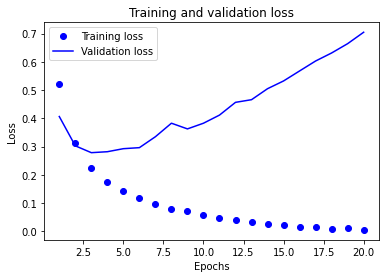

In [19]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# Plotting the training and validation loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')        # 'bo' is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')   # 'b' is for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

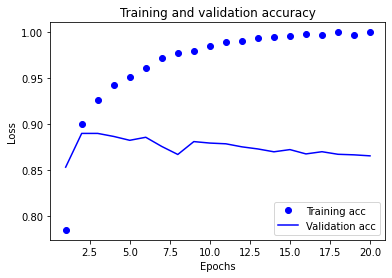

In [20]:
# Plotting the training and validation accuracy
plt.clf()     # Clears the figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
# Retraining a model from scratch
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2375 - accuracy: 0.9460
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1404 - accuracy: 0.9584
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1136 - accuracy: 0.9654
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.4813 - accuracy: 0.8547


[0.48128801584243774, 0.8547199964523315]

Using a trained network to generate predictions on new data

In [22]:
model.predict(x_test)

array([[0.02377468],
       [0.99999654],
       [0.9557937 ],
       ...,
       [0.07914266],
       [0.06285229],
       [0.74883336]], dtype=float32)